In [45]:
# IRIS FLOWER CLASSIFICATION

In [46]:
# IMPORTING THE DATASETS

In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data=pd.read_csv(r'C:\Users\Shraddha\OneDrive\Desktop\CODSOFT\IRIS.csv',header=0)
print(data.shape)
data

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [49]:
# Finding the missing values

In [50]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [51]:
# Finding the Multi-Collinearity to drop columns

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_21196\2086025028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


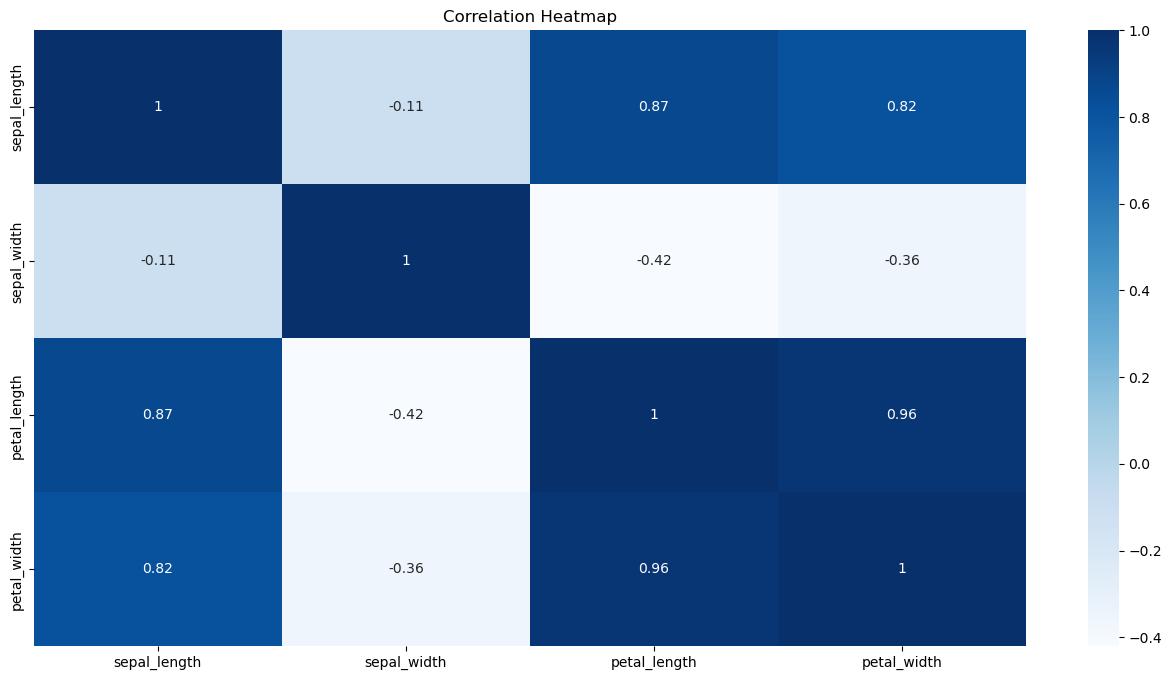

In [52]:
plt.figure(figsize=(16, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [53]:
data.drop('petal_length',axis=1,inplace=True)

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_21196\2086025028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


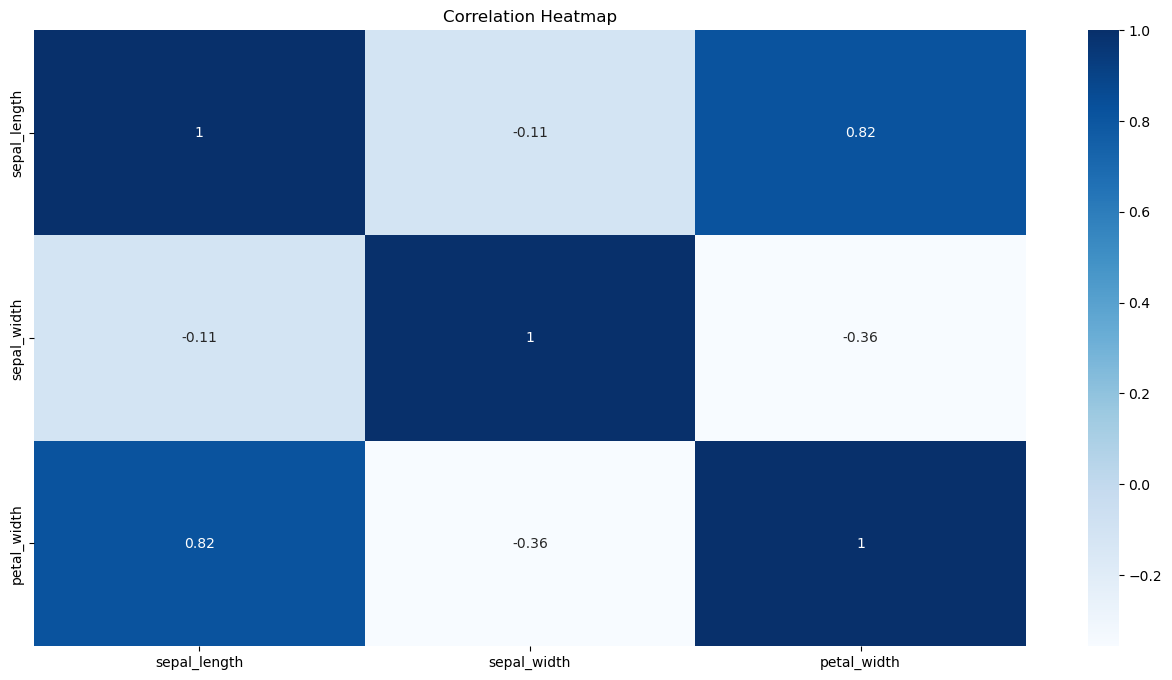

In [54]:
plt.figure(figsize=(16, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [55]:
# Transforming the categorical data to numerical

In [56]:
from sklearn import preprocessing
colname=['species']
le=preprocessing.LabelEncoder()
for x in colname:
    data[x]=le.fit_transform(data[x])
    
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature', x)
print('mapping', le_name_mapping)

Feature species
mapping {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [57]:
print(data.head())

   sepal_length  sepal_width  petal_width  species
0           5.1          3.5          0.2        0
1           4.9          3.0          0.2        0
2           4.7          3.2          0.2        0
3           4.6          3.1          0.2        0
4           5.0          3.6          0.2        0


In [58]:
data.describe()

,sepal_length,sepal_width,petal_width,species
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,1.198667,1.000000
std,0.828066,0.433594,0.763161,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.100000,2.800000,0.300000,0.000000
50%,5.800000,3.000000,1.300000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [59]:
# Splitting the values

In [60]:
# Adding values of all the columns except species in X
x = data.values[:,0:-1]
# Adding value of only survived column in Y because we have to predict the species
y = data.values[:,-1]

In [61]:
x.shape

(150, 3)

In [62]:
y.shape

(150,)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [64]:
# SVM Model

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10, stratify=y)
from sklearn.svm import SVC
#create a model
svc_model=SVC(kernel='linear',C=0.01,gamma='scale')
#fitting training data into the model
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
print(y_pred)
print(list(zip(y_test,y_pred)))



from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[0. 2. 0. 2. 1. 0. 1. 1. 0. 1. 2. 2. 2. 0. 2. 2. 0. 0. 2. 1. 0. 0. 2. 0.
 2. 1. 2. 1. 0. 1. 2. 1. 1. 2. 1. 0. 2. 2. 0. 1. 2. 1. 0. 0. 1.]
[(0.0, 0.0), (2.0, 2.0), (0.0, 0.0), (2.0, 2.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (0.0, 0.0), (2.0, 2.0), (1.0, 2.0), (0.0, 0.0), (0.0, 0.0), (2.0, 2.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (2.0, 2.0), (0.0, 0.0), (2.0, 2.0), (1.0, 1.0), (2.0, 2.0), (1.0, 1.0), (0.0, 0.0), (2.0, 1.0), (2.0, 2.0), (1.0, 1.0), (1.0, 1.0), (2.0, 2.0), (1.0, 1.0), (0.0, 0.0), (2.0, 2.0), (2.0, 2.0), (0.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0)]
[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.93      0.87      0.90        15
         2.0       0.88      0.93      0.90        15

    accuracy                           0.9

In [66]:
# Logistic Model

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7, stratify=y)

from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data into the model
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print('classification report: ',)
print(classification_report(y_test,y_pred))
acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy of the model:  0.9777777777777777


In [68]:
# Hyper Parameter Tunning

In [69]:
from sklearn.model_selection import GridSearchCV
def hyperparameter_tuning (model,params, X_train,X_test,y_train,y_test):
    # Perform grid search cross-validation to find the best hyperparameters
    grid = GridSearchCV(model, params, cv=5, n_jobs=4)
    grid.fit(X_train, y_train)
    best_hyperparameter = grid.best_estimator_

    # Print the best hyperparameters and score found during the grid search
    print("Best parameters:", best_hyperparameter)
    print("Best Accuracy Score: {:.2f}%".format(grid.best_score_ * 100))


    # Predict on the test data using the best model
    y_pred = best_hyperparameter.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    return best_hyperparameter

In [70]:
svc=SVC()
svc_param = {'C':[0.25,0.50,0.75],"kernel":["linear","poly", "rbf"]}
hyperparameter_tuning(svc,svc_param,X_train,X_test,y_train,y_test)

Best parameters: SVC(C=0.5, kernel='linear')
Best Accuracy Score: 96.19%


SVC(C=0.5, kernel='linear')

In [71]:
# CONCLUSION - The best model is Logistic Regression for this dataset with a accuracy of 97%